In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
df = pd.read_csv("rainfall.csv")
print(df.head())


         Date  MinTemp  MaxTemp  Humidity  Pressure  WindSpeed  Rainfall
0  2020-01-01     13.0     36.0      46.5    1002.3        6.9       8.0
1  2020-01-02     13.4     30.0      60.5     995.4       10.8      19.7
2  2020-01-03     15.8     35.5      81.9    1010.9       21.2      24.2
3  2020-01-04     14.1     30.4      60.0     999.1       15.3      16.4
4  2020-01-05     22.9     37.7      83.7    1022.4       20.9      26.4


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Define features and target variable
X = df.drop("Rainfall", axis=1)


Date         0
MinTemp      0
MaxTemp      0
Humidity     0
Pressure     0
WindSpeed    0
Rainfall     0
dtype: int64


In [26]:
X = df[['MinTemp', 'MaxTemp', 'Humidity', 'Pressure', 'WindSpeed']]
y = df['Rainfall']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 8.53829354506573
R² Score: 0.7606752452569547


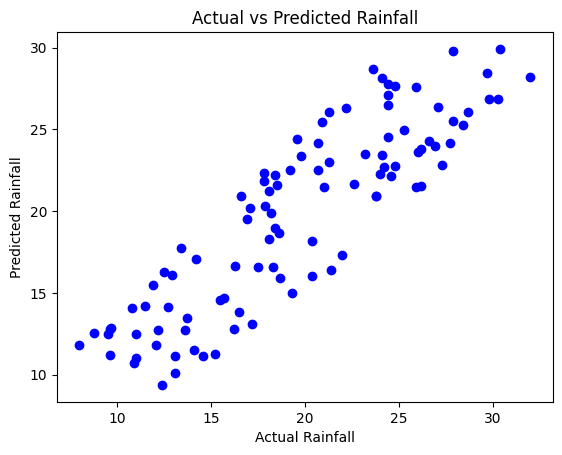

In [30]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()


In [31]:
new_data = pd.DataFrame({
    'MinTemp': [20],
    'MaxTemp': [32],
    'Humidity': [80],
    'Pressure': [1005],
    'WindSpeed': [12]
})

predicted_rainfall = model.predict(new_data)
print("Predicted Rainfall (mm):", predicted_rainfall[0])


Predicted Rainfall (mm): 22.910879973173778
